[View in Colaboratory](https://colab.research.google.com/github/michalMalujdy/machine-learning-colab/blob/master/mnist_digit_classification.ipynb)

# Main
Learn classifying digits from images included in MNIST datasets using Keras.




---



Import neccessary moduls and initialize the network model.

In [0]:
!pip install -q keras 
import numpy as np
import keras
from keras import models
from keras import layers

network = models.Sequential()




---






The output of the first layer is chosen to be 512 (which is arbitrary), what means that first hidden layer consists of 512 neurons. The input of the layer is also the input of the whole network, so it needs to fit the dimension of the data (train and test) which are arrays of size 28 x 28 and corresponds to images of size 28x28 pixels.

In [0]:
network.add(layers.Dense(512, activation = 'relu', input_shape=(28 * 28,)))



---



The second hidden layer is also a output layer of the whole network so its output needs to fit our needs. Our goal is to state the chances that given input is one of the ten digit (belongs to one of our 10 classes). The softmax function will provide that functionality by returning for every input an array  of size 10 with each index corresponding to numbers 0-9.

In [0]:
network.add(layers.Dense(10, activation = 'softmax'))



---



Compile the network with chosen optimizer, loss function and desired learning feedback values.

In [0]:
network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])



---



Load training and test datasets into numpy arrays

In [0]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



---



Squash the arrays of size 28x28 to a single vector for every input

In [0]:
train_images = train_images.reshape(60000, 28 * 28)
test_images = test_images.reshape(10000, 28 * 28)



---



Normalize the values of each input from range <0;255> given by keras module, to <0;1> range so that it is convinient for the softmax classifier.

In [0]:
normalized_train_images = train_images.astype('float') / 255
normalized_test_images = test_images.astype('float') / 255



---



Encode the labels categorically

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



---



Perform the actual learning by invoking the fit() method upon the network model. 

In [46]:
network.fit(normalized_train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2579 - acc: 0.9249
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.1021 - acc: 0.9701
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0674 - acc: 0.9801
Epoch 4/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0480 - acc: 0.9858
Epoch 5/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0367 - acc: 0.9889




---



Check the performence on the test dataset

In [47]:
loss, accuracy = network.evaluate(normalized_test_images, test_labels)
print('The accuracy on test data: {}'.format(accuracy))

10000/10000 [==============================] - 1s 72us/step
The accuracy on test data: 0.9798




---



# Optional

---



Display random digit image from the train set

index:  40512
label:  7


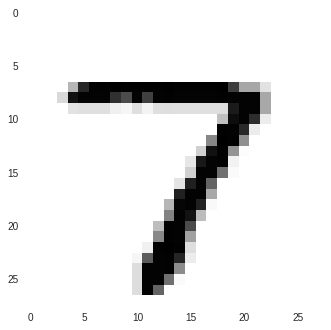

In [48]:
from random import randint
import matplotlib.pyplot as plt
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

randomIndex = randint(0, len(train_images))
print('index: ', randomIndex)
print('label: ', train_labels[randomIndex])

plt.figure().gca().grid(False)
plt.imshow(train_images[randomIndex])